# Avocado - Regression & Classification

Given data on avocado prices and sales volume in multiple US markets and various other factors like Date, AveragePrice,Total Volume, Total Bags,Year,Type etc.
The goal is to predict average price of avocado and Predict the region of the Avocado sale, using best regression and classification models.

## About the data

- ‘Unamed: 0’ : Its just a index feature that does not contribute to the data in any way
- ‘Date’ : Date in which that particular sale was recorded
- ‘AveragePrice’ : The average price of avocado on that particular data and region
- ‘Total Volume’ : Total sales volume of avocados
- ‘4046’ : Total sales volume of Small/Medium Hass Avocado
- ‘4225’ : Total sales volume of Large Hass Avocado
- ‘4770’ : Total sales volume of Extra Large Hass Avocado
- ‘Total Bags’: Total number of Bags sold
- ‘Small Bags’: Total number of Small Bags sold
- Large Bags’: Total number of Large Bags sold
- ‘XLarge Bags’: Total number of XLarge Bags sold
- ‘Type’ : Type of avocado
- ‘Year’ : Year in which that particular sale is measured 
- ‘Region’ : Region in which that particular sale is experienced

In [1]:
# Importing the data

import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\User\Desktop\Projects\avocado.csv', parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [2]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen that the data contains empty tuples, which are unecessary and need to be dropped.

In [3]:
df.shape

(16468, 14)

In [4]:
# Dropping rows which are entirely empty

df.dropna(how='all', inplace=True)
df.shape

(1517, 14)

It can be seen that almost 15000 rows were deleted from the dataset. Leaving us with scarce data.

The column ‘Unamed: 0’ seems very unecessary, hence it should be dropped

In [5]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


- There are total of 1517 rows.
- we can infer that there are no missing values.
- Target Variable 'Average Price' looks normally distribured as mean and median(50 percentile value) are almost similar but with slight skewedness twoards right
- The column ‘XLarge’ is suspectable of consisting outliers, as it observes a large difference between it 3rd Quartile Value and Maximum value

In [7]:
df.describe(include=['O'])

,type,region
count,1517,1517
unique,1,51
top,conventional,California
freq,1517,76


- The column ‘type’ consists just one type of data, hence it is safe to drop the column
- The column ‘region’ entails 51 unique regions, of which 'California' occurs most frequently

In [8]:
df = df.drop(['type'], axis=1)

In [9]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                   float64
region                  object
dtype: object

The column Date can be used to formulate two more columns i.e 'Month' and 'Year' as
- The column month can help in month-wise analysis
- the preexisting year column is in the dtype float, which is not the suitable format for Year data

In [10]:
# Creating columns 'Month' and 'Year'

df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12,2015
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11,2015


- Now seince we've created two new columns, we can drop the ‘Date’ column, because we don't need it anymore
- The columns ‘year’ can be dropped as we have formulated a new column

In [11]:
df = df.drop(['Date','year'], axis=1)

In [12]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
region          0
Month           0
Year            0
dtype: int64

- The data does not comprise of any null values, hence it is safe to move on to the EDA process

In [13]:
df.shape

(1517, 12)

In [14]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
region           object
Month             int64
Year              int64
dtype: object

### Summary

Dataset info:

- Number of variables: 12
- Number of observations: 1517
- Missing cells: 0

Variables types:

- Numeric: 11
- Categorical: 1

Observations:

- Target variable in normally distributed but with slight skewedness towards right
- Target variable Region has high cardinality

# EDA

In [15]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

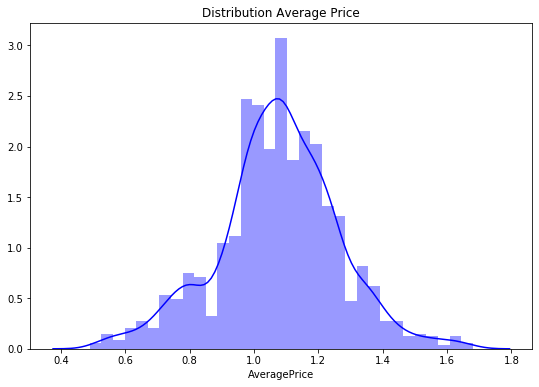

In [16]:
plt.figure(figsize = (9,6))
plt.title('Distribution Average Price')
sns.distplot(df['AveragePrice'], color = 'b')

Average Price data is Almost a normal distribution, where maximum values lie between 0.7 and 1.4 

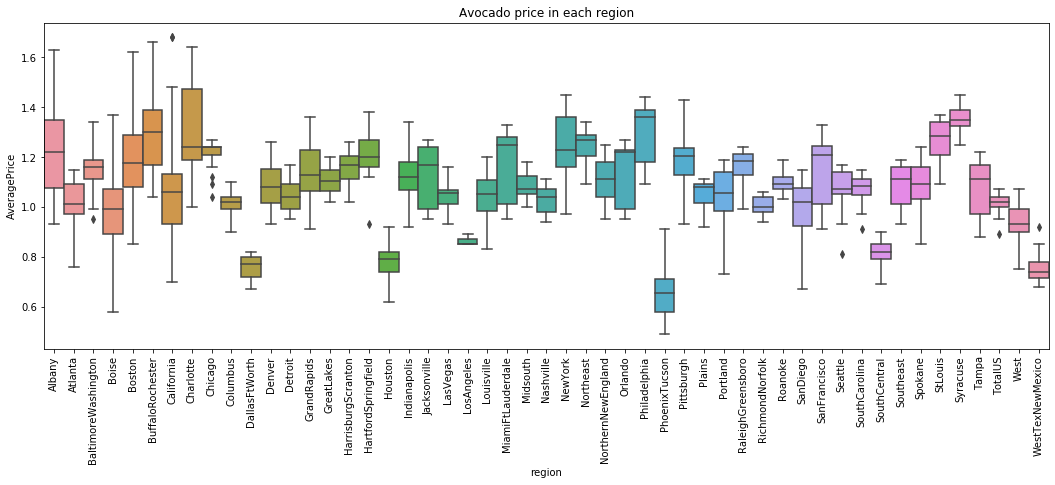

In [17]:
plt.figure(figsize =(18,6))
plt.title('Avocado price in each region')
plt.xticks(rotation ='vertical')
sns.boxplot(x = 'region', y = 'AveragePrice', data = df, width = 1, whis= 2)

- BuffaloRochester has the highest Average price of avocados, followed by Albany and Boston 
- PhoenixTucson observes the lowest Average price of avocados, followed by Boise and Houston 
- It can also be seen that Average Price Varies visibly for each region, hence it can be concluded that both the variables play avital role in determining the values of another

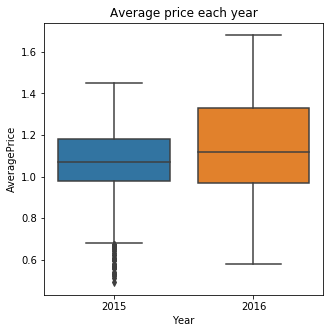

In [18]:
plt.figure(figsize = (5,5))
plt.title('Average price each year')
sns.boxplot(x = 'Year', y= 'AveragePrice', data = df)

- The Median of Average price of avocados when compared in both year's is almost equal, which means that change in year did not necessariy mark an increase in average price of avocaods
- However 2016 noticed an increase in its maximum average price

Text(0.5, 1.0, 'Average Price According to Months')

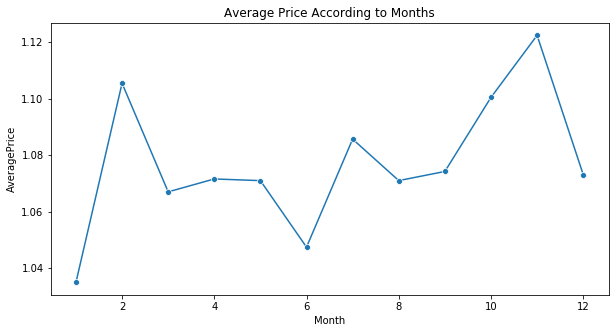

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="AveragePrice", marker='o', ci=None, data=df)
plt.title("Average Price According to Months")

- Average price of Avocados observes it's highest peak in the 11th month (Novemeber)
- Average price of Avocados observe a steep drop during winter months i.e 11 and 12 (November and December)
- However the Average price of Avocados observes a high rise again as winter subsides and spring begins to take over, i.e in from 12 to 1
- The Average price of Avocados shifts variably almost every month 

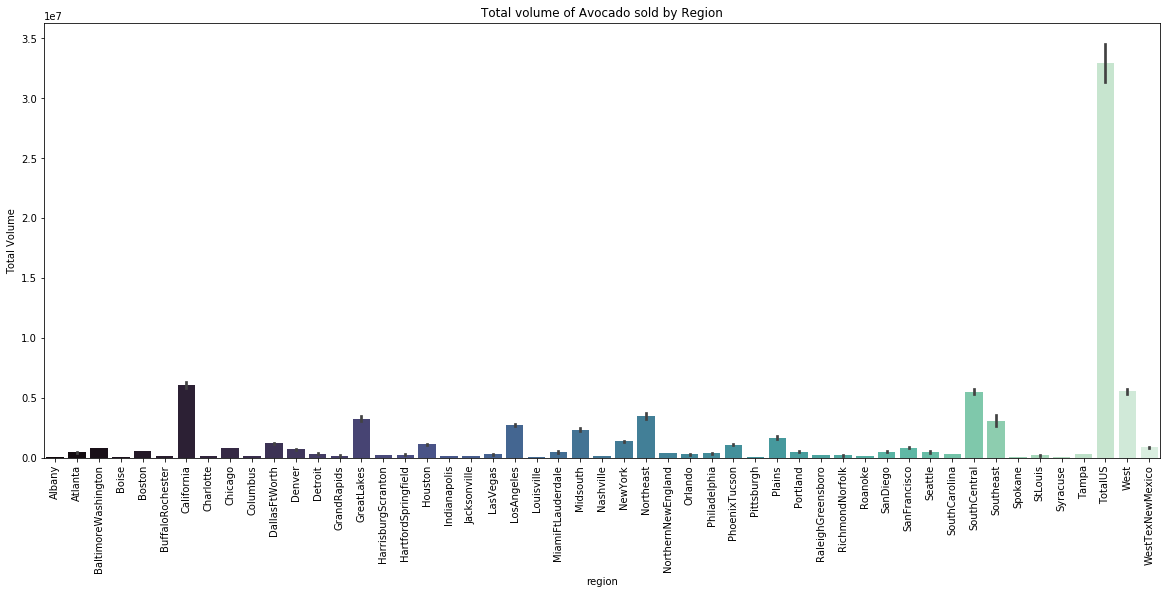

In [20]:
plt.figure(figsize=(20,8))
plt.title("Total volume of Avocado sold by Region")
sns.barplot(x="region", y="Total Volume", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- As obvious, the Total US makes the maximum sales which no region can match
- However, California marks the highest total sales of avocaods
- Among other Avocado obssesed regions are SouthCentral and the West USA
- There are also regions which are not very fond of Avocados like Boise, Spokan and Louiseville 

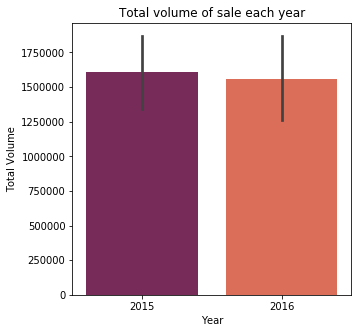

In [21]:
plt.figure(figsize=(5,5))
plt.title('Total volume of sale each year')
sns.barplot(x="Year", y="Total Volume", palette="rocket", data=df)

- Both the years observes almost same amount of sale

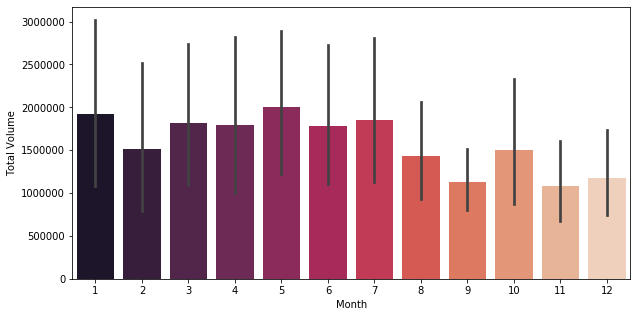

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x="Month", y="Total Volume", palette="rocket", data=df)

- Sales volume of Avocados observes it's highest peak in the 5th month (May)
- Sales volume of Avocados observes it's lowest during winter months i.e 11 and 12 (November and December)
- However the sales of Avocados observes a high rise again as winter subsides and spring begins to take over, i.e in 1st month (January)
- The sales of Avocados is almost stable through spring and summer and begins to observe a fall from the fall season  

# Regression - Price Prediction

Checking correlation of variables with the target variable 'AveragePrice'

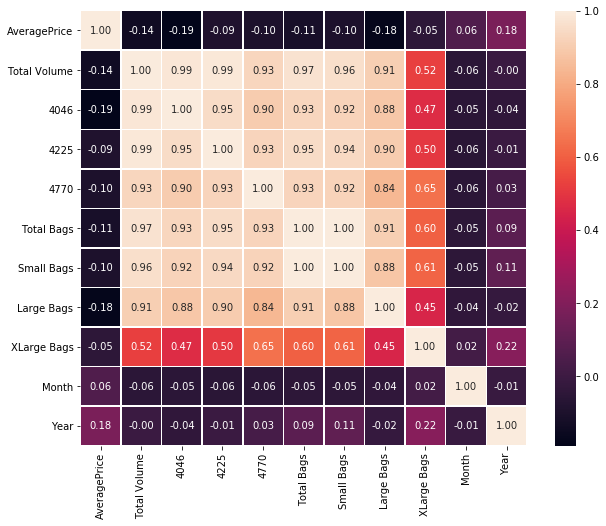

In [23]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot= True, linewidths=0.5, linecolor="white", fmt= '.2f')

As we can from the heatmap above, all the Features are not corroleted with the Average Price column, instead most of them are correlated with each other. Which will not help get a good model. 

- Thus Feature Engineering needs to be performed on the categorical Features : region

## Feature Engineering

#### Encoding the Categorical Variable

In [24]:
# Performing OneHotEncoding

df_c = pd.get_dummies(df.region)
df = pd.concat([df, df_c], axis=1)
df.shape

(1517, 63)

The column region is no longer needed

In [25]:
df = df.drop(['region'], axis=1)

#### Checking for skewness in data

In [26]:
df.skew()

AveragePrice       -0.109444
Total Volume        6.200138
4046                6.051830
4225                6.394926
4770                5.405164
                      ...   
Syracuse            8.775366
Tampa               6.459339
TotalUS             7.603358
West                6.264246
WestTexNewMexico    7.301281
Length: 62, dtype: float64

#### Treating Skewness using log method

In [27]:
for col in df.columns:
    if df.skew().loc[col]>2.0:
        df[col]=np.log1p(df[col])

In [28]:
df.skew()

AveragePrice       -0.109444
Total Volume        0.667468
4046               -0.160268
4225                0.184436
4770               -0.355508
                      ...   
Syracuse            8.775366
Tampa               6.459339
TotalUS             7.603358
West                6.264246
WestTexNewMexico    7.301281
Length: 62, dtype: float64

It can be seen that after treating skewness, the data is not steeply skeweed towards any dirrection thus Outliers have been dealt with

#### Shuffling the data before performing the split

In [29]:
df = df.sample(frac = 1, random_state=0)

#### Splitting the data 

In [30]:
x = df.drop(columns=['AveragePrice'])
y = df[['AveragePrice']]

In [31]:
x.shape, y.shape

((1517, 61), (1517, 1))

#### Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Training Phase

Now our data are ready! lets apply our model which is going to be a Regression type because our Target variable 'AveragePrice'is continuous. 

Let's now begin to train out regression model! We will need to first split up our data into an X_train and y_train array that contains the features to train on, and a x_test and y_test array with the target variable

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.20,random_state=55)

#### Finding the best values for random state

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state, test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 score corresponding to', final_r_state, 'is', max_r_score)

max r2 score corresponding to 96 is 0.8322219668573831


It can be seen that maximum r2 score is corresponding to the 96 value of random state

#### Checking for Over-fitting in the Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([0.77897955, 0.77142644, 0.78850079, 0.78692332, 0.80042038])

- It can be seen that, since the r2 score's are not varying insanly, the model is not overfitting the data.

- Lasso and Ridge Regression don't need to be performed 

- However, if we want to achieve better results, more data needs to be used.

In [36]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.20,random_state=96)

In [37]:
import warnings
warnings.filterwarnings('ignore')

## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [39]:
lms = r2_score(y_test,pred)
print('R2 Score:',lms*100)

R2 Score: 83.22219668573831


In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.05934762453434964
MSE: 0.006360124909327739
RMSE: 0.07975039128009177


- R2 score is a acceptable value 
- RMSE is very low which is good news
- But it is too early to declare this as the best model

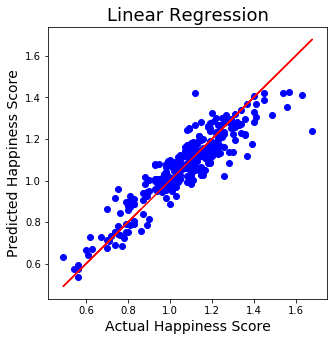

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=pred, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

- As we can see that we have a slightly scattered straigt line so this is a good model to apply on this data

## DecisionTree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [43]:
dts = r2_score(y_test,pred)
print('R2 Score:',dts*100)

R2 Score: 70.22307319055551


In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07332236842105262
MSE: 0.01128782894736842
RMSE: 0.10624419488785455


- R2 score is low compared to Linear Regression
- RMSE is low but is greater than that of Linear Regression
- But it is safe to declare that this is not the best model

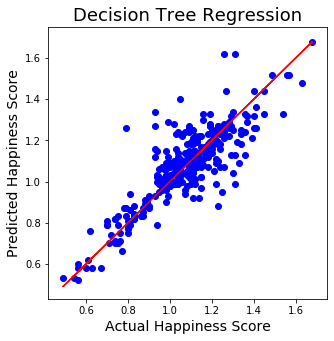

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=pred, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

The predicted values do not form a straight line

## RandomForest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [47]:
rfs = r2_score(y_test,pred)
print('R2 Score:',rfs*100)

R2 Score: 86.67485987609803


In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.05280000000000005
MSE: 0.005051290328947384
RMSE: 0.07107243016069863


- R2 score is highest by far
- RMSE is lowest when compared to Linear Regression
- Random Forest is the best model

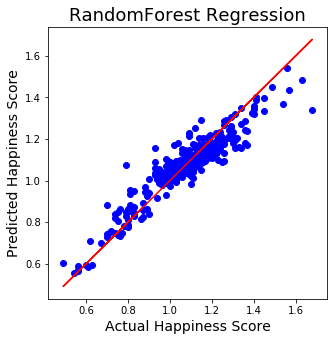

In [49]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=pred, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('RandomForest Regression',fontsize=18)
plt.show()

Predicted Results form a clean line

## SVM Regression

In [50]:
from sklearn.svm import SVR
sv = SVR(kernel = 'rbf', gamma = 'scale')
sv.fit(x_train, y_train)
sv.score(x_train, y_train)
pred = sv.predict(x_test)

svs = r2_score(y_test,pred)
print('R2 Score:',svs*100)

R2 Score: 80.2043600938202


In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.06681574445275333
MSE: 0.0075041255464209046
RMSE: 0.0866263559571849


- Both R2 and RMSE score is good but higher when compared to RandomForestRegressor
- But it is safe to declare that this is not the best model

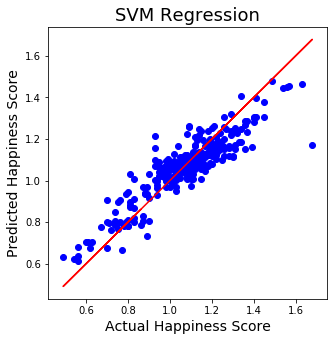

In [52]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=pred, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('SVM Regression',fontsize=18)
plt.show()

## GradientBoost Regression

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
gbr.score(x_train, y_train)
pred = gbr.predict(x_test)

gbs = r2_score(y_test,pred)
print('R2 Score:',gbs*100)

R2 Score: 79.66382836414235


In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.06919400872253019
MSE: 0.007709030160798147
RMSE: 0.08780108291358454


- Both R2 and RMSE score is good but higher when compared to RandomForestRegressor
- But it is safe to declare that this is not the best model

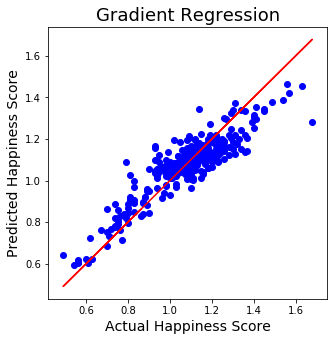

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=pred, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Gradient Regression',fontsize=18)
plt.show()

## ExtraTree Regression

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor().fit(x_train, y_train)
reg.score(x_train, y_train)
reg.score(x_test, y_test)
pred = reg.predict(x_test)

regs = r2_score(y_test,pred)
print('R2 Score:',regs*100)

R2 Score: 90.47245934729425


In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.044166776315789504
MSE: 0.0036116974013157993
RMSE: 0.06009739928911899


- R2 score is highest by far
- RMSE is the lowest when compared to RandomForest Regression
- ExtraTree is the best model

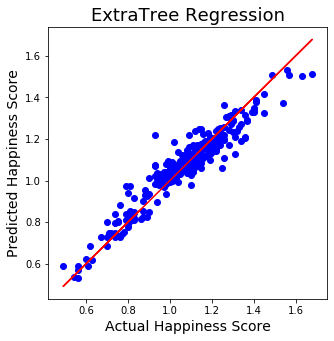

In [58]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=pred, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('ExtraTree Regression',fontsize=18)
plt.show()

Best Fit predicted data line can be observed

## Picking the best model

In [59]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree Regression','Random Forest Regression',
              'SVM Regression','Gradient Boost Regression', 'Extratree regression'],
    'R2 Score': [lms*100, dts*100, rfs*100, svs*100, gbs*100, regs*100 ],
    })
models.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
5,Extratree regression,90.472459
2,Random Forest Regression,86.674860
0,Linear Regression,83.222197
3,SVM Regression,80.204360
4,Gradient Boost Regression,79.663828
1,Decision Tree Regression,70.223073


Top 3 best performing models are 
- ExtraTreeRegressor
- RandomForestRegressor
- Linear Regression

Lets check for the overfitting in the above mentioned models

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### CrossValidation on LinearRegression

In [61]:
lmscore = cross_val_score(lr,x,y,cv=3)
lmc = lmscore.mean() 
print('Cross Val Score:',lmc*100)

Cross Val Score: 77.90807826155101


- The R2 Score for Linear Regression was 83.22
- The difference between the R2 Score and Cross Val Score is '6'

#### CrossValidation on RandomForestRegression

In [62]:
rfscore = cross_val_score(rdr,x,y,cv=3)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

Cross Val Score: 80.59808900461076


- The R2 Score for Random Forest Regression was 86.14
- The difference between the R2 Score and Cross Val Score is '6'

#### CrossValidation on ExtraTreeRegression

In [63]:
rfscore = cross_val_score(reg,x,y,cv=3)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

Cross Val Score: 86.31336621910656


- The R2 Score for ExtraTree Regression was 90.50
- The difference between the R2 Score and Cross Val Score is '4'

It can be seen that the difference between the accuracy score and cross validation score is minimum in ExtraaTreeRegression, Hence that is our final model

## Hyperparameter Tuning - ExtraTreeRegressor
Since we have picked ExtraTreeRegressor as our final model it is essential to perform hyperparameter tuning on it to extract the best score

In [64]:
grid_param = {'n_estimators': [100,300,500],
             'max_features': ['auto','sqrt','log2']}

from sklearn.model_selection import RandomizedSearchCV
reg = ExtraTreesRegressor()
reg_random = RandomizedSearchCV(estimator = reg,
                               param_distributions = grid_param,
                               cv=5, verbose=2, n_jobs = -1)

reg_random.fit(x_train,y_train)
print(reg_random.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   23.6s finished


{'n_estimators': 500, 'max_features': 'auto'}


In [65]:
reg = ExtraTreesRegressor(n_estimators=500, max_features='auto')
reg.fit(x_train, y_train)
reg.score(x_train, y_train)
reg.score(x_test, y_test)
pred = reg.predict(x_test)

regs = r2_score(y_test,pred)
print('R2 Score:',regs*100)

R2 Score: 90.45937485107707


In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.04384960526315764
MSE: 0.003616657468421015
RMSE: 0.060138652033621565


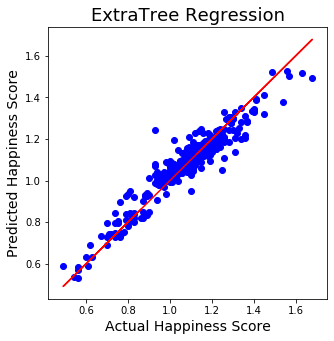

In [67]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=pred, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('ExtraTree Regression',fontsize=18)
plt.show()

#### Saving the best model

In [68]:
import pickle

filename = 'avocado_reg.pkl'
pickle.dump(reg, open(filename, 'wb'))

## Conclusion

From the above data we can observe,

- DecisionTreeRegression Model has least R-Squared Value - UnderFit Model
- ExtraTreeRegressor Model has maximum R-Squared Value for train data as well as for test data - Best Model

# Classification -  Classifying into regions

#### Importing data

In [69]:
df = pd.read_csv(r'C:\Users\User\Desktop\Projects\avocado.csv', parse_dates=['Date'])

Performing same data cleaning and feature engineering procedures as performed above

In [70]:
df.dropna(how='all', inplace=True)
df.shape

(1517, 14)

In [71]:
df = df.drop('Unnamed: 0', axis = 1)

In [72]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,2015
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,2015


In [73]:
df = df.drop(['Date','year','type'], axis=1)

In [74]:
df['region'].dtype

dtype('O')

## Feature Engineering

Performing LabelEncoding on the Target Variable as it is an object type data

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['region'])
df['region']=le.transform(df['region'])

In [76]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
Month           0.101439
Year            1.828332
dtype: float64

In [77]:
for col in df.columns:
    if df.skew().loc[col]>5.0:
        df[col]=np.log1p(df[col])

In [78]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
region          0.288146
Month           0.101439
Year            1.828332
dtype: float64

It can be seen that after treating skewness, the data is not steeply skeweed towards any dirrection thus Outliers have been dealt with

In [79]:
ser1= df.region.value_counts()
print(ser1
     )

6     76
0     67
2     65
3     65
4     62
1     54
31    52
5     51
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
22    34
47    34
7     31
34    30
28    29
17    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
14    18
10    17
37    17
23    17
18    16
35    16
45    16
39    15
30    13
16    13
27    12
33    12
20    10
43     9
40     9
21     3
Name: region, dtype: int64


The data is not perfectly balanced,however it is not highly imbalanced, thus it can be used

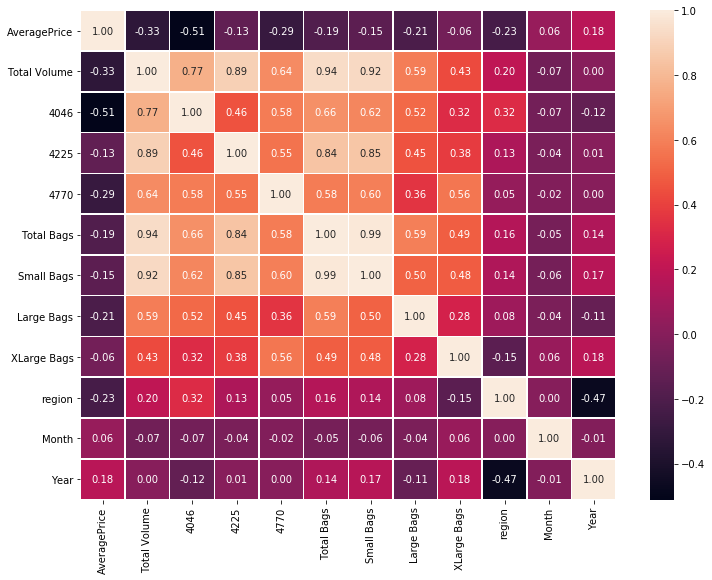

In [80]:
correlation = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(correlation, annot= True, linewidths=0.5, linecolor="white", fmt= '.2f')

- Year is behaving very negatively with the target value, hence it should be dropped 

In [81]:
df = df.drop(['Year'], axis=1)

#### Splitting the data

In [82]:
x = df.drop(columns=['region'])
y = df[['region']]

In [83]:
x.shape, y.shape

((1517, 10), (1517, 1))

#### Checking for variable importance

In [84]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)

[0.06883623 0.12003756 0.1513887  0.13099688 0.12581565 0.09871743
 0.09766632 0.10818226 0.07760757 0.02075139]


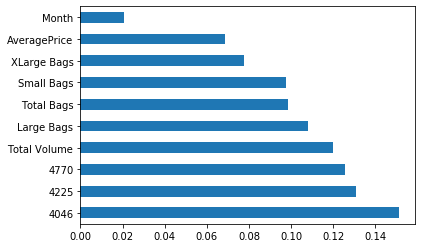

In [85]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(model.feature_importances_,index =x.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

- Month is the least important feature, thus it can be dropped

In [86]:
x = x.drop(['Month'], axis=1)

In [87]:
x.shape

(1517, 9)

# Training Phase

Now our data are ready! lets apply our model which is going to be a Classification type because our Target variable 'region'is categorical. 

Let's now begin to train out regression model! We will need to first split up our data into an X_train and y_train array that contains the features to train on, and a x_test and y_test array with the target variable

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=47)

## Logistic Classification

In [89]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)
log = accuracy_score(test_y,pred)*100

print('accuracy score:', log)
print('\n')
print (classification_report(test_y,pred))

accuracy score: 77.54491017964071


              precision    recall  f1-score   support

           0       0.67      0.84      0.74        19
           1       0.77      0.83      0.80        12
           2       0.94      1.00      0.97        16
           3       0.90      0.75      0.82        12
           4       0.73      0.73      0.73        11
           5       0.86      1.00      0.92        12
           6       0.81      1.00      0.89        17
           7       0.86      0.86      0.86         7
           8       1.00      1.00      1.00         7
           9       0.86      1.00      0.92        12
          10       1.00      0.60      0.75         5
          11       1.00      0.88      0.93         8
          12       0.91      1.00      0.95        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          16       0.00      0.00      0.00  

## Gaussian NaiveBayes

In [90]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
predgnb= gnb.predict(test_x)
gaussian = accuracy_score(test_y,predgnb)*100

print('accuracy score:',gaussian)
print('\n')
print(confusion_matrix(test_y, predgnb))
print('\n')
print(classification_report(test_y, predgnb))

accuracy score: 91.31736526946108


[[19  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  8]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        16
           3       0.92      1.00      0.96        12
           4       1.00      0.73      0.84        11
           5       1.00      1.00      1.00        12
           6       0.85      1.00      0.92        17
           7       1.00      0.57      0.73         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        12
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        10
          13       0.75      1.00      0.86      

## SVM Classifier

In [91]:
from sklearn.svm import SVC
from sklearn import svm, datasets

parameters = {'kernel':['linear','rbf'], 'C':[1,5,10]}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [92]:
from sklearn.svm import SVC
svc=SVC(C=10, kernel='linear')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
svcs = accuracy_score(test_y, predsvc)*100

print('accuracy score:',svcs)
print('\n')
print(confusion_matrix(test_y, predsvc))
print('\n')
print(classification_report(test_y, predsvc))

accuracy score: 95.50898203592814


[[19  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  7]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        11
           5       0.92      1.00      0.96        12
           6       0.89      1.00      0.94        17
           7       0.88      1.00      0.93         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        12
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00      

## DecisionTree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini','entropy']}
dtc =DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy'}


In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
decision_e = accuracy_score(test_y, preddtc)*100

print('accuracy score:',decision_e )
print('\n')
print(confusion_matrix(test_y, preddtc))
print('\n')
print(classification_report(test_y, preddtc))

accuracy score: 89.22155688622755


[[16  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  8]]


              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       1.00      0.92      0.96        12
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        12
           4       0.92      1.00      0.96        11
           5       0.92      0.92      0.92        12
           6       0.85      1.00      0.92        17
           7       1.00      0.71      0.83         7
           8       0.88      1.00      0.93         7
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         8
          12       1.00      0.90      0.95        10
          13       1.00      0.67      0.80      

## RandomForest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [100,300,500],'random_state': [40,45,50,55,60,65,70,75]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_estimators': 300, 'random_state': 50}


In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300,random_state=50)
rf.fit(train_x,train_y)
predrf = rf.predict(test_x)
random = accuracy_score(test_y,predrf)*100

print('accuracy score:',random)
print('\n')
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

accuracy score: 97.0059880239521


[[18  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  8]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        11
           5       0.92      1.00      0.96        12
           6       0.89      1.00      0.94        17
           7       1.00      0.86      0.92         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        12
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         

## KNN Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [5,10,15,20,25,30]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_neighbors': 5}


In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn = knn.predict(test_x)
knn_a = accuracy_score(test_y, predknn)*100

print('accuracy score:',knn_a)
print('\n')
print(confusion_matrix(test_y, predknn))
print('\n')
print(classification_report(test_y, predknn))

accuracy score: 90.11976047904191


[[18  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  8]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.92      0.92      0.92        12
           2       0.89      1.00      0.94        16
           3       1.00      1.00      1.00        12
           4       1.00      0.82      0.90        11
           5       0.79      0.92      0.85        12
           6       0.85      1.00      0.92        17
           7       1.00      1.00      1.00         7
           8       1.00      0.86      0.92         7
           9       1.00      1.00      1.00        12
          10       0.80      0.80      0.80         5
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00        10
          13       1.00      0.67      0.80      

#### Picking the best model

In [99]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', ' Gaussian Naive Bayes',
              'Decision Tree'],
    'Score': [svcs,knn_a,log,random,gaussian,decision_e]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,97.005988
0,Support Vector Machines,95.508982
4,Gaussian Naive Bayes,91.317365
1,KNN,90.119760
5,Decision Tree,89.221557
2,Logistic Regression,77.544910


#### Saving the best model

In [100]:
import pickle

filename = 'avocado_classi.pkl'
pickle.dump(random, open(filename, 'wb'))

## Conclusion

From the above data we can observe,

- SVMClassifier Model has least accuracy score - UnderFit Model
- randomForestClassifier Model has maximum accuracy for test data - Best Model

## Market Insights

- Avocado is a very popular and in demand fruit consumed by the population of US


- Avocado experiences the least sales during extreme sales weather condistions like in the 6th month (June) which is considered as the hottest month of the year in US and in the 12th month (December) which is the coldest month of the year in US.


- Avocado is in demand during spring and the fall season.


- Major regions of US that contribute to the maximum sale of Avocado's are California, GreatLakes, LosAngeles, MidSouth US, NorthEast US, SouthCentral US, SouthEast US and the West US.